Problem 11:

ValueError: x and y must have same first dimension, but have shapes (511,) and (256,)

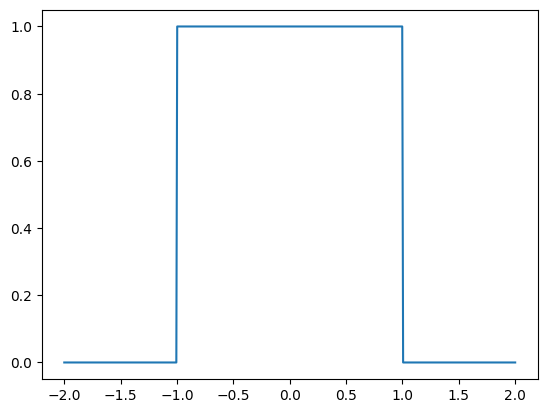

In [5]:
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt

def box(f):
    return   np.where(np.abs(f) <= 1,1, 0)
x_min = -2.0 # the effective range of function necessary
x_max = 2.0
n = 512 # number of points(will be doubled while zero padding)
x = np.linspace(x_min,x_max,n)
d = (x_max-x_min)/n 

f=box(x)

g=box(x)
f_pad=np.pad(f,(0,len(x)),mode='constant',constant_values=(0,0))

g_pad=np.pad(g,(0,len(x)),mode='constant',constant_values=(0,0))

plt.plot(x,f)
convolve = np.zeros(2*(n-1),dtype = np.float64)
convolve = (d/2.0)*np.sqrt(2*n-1)*((ft.ifft(ft.fft(f_pad,norm = 'ortho')*ft.fft(g_pad,norm = 'ortho'),norm = 'ortho')))
plt.plot(np.linspace(x_min,x_max,n-1),convolve[(n-1)-n//2+1:(n-1)+n//2].real)




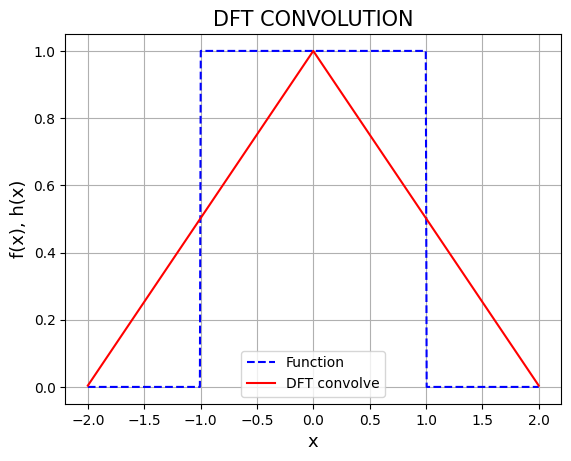

In [2]:
# Amit
import numpy as np
import numpy.fft as ft
import matplotlib.pyplot as plt

def f(x): #The rectangular pulse function
    out = np.zeros(len(x),dtype=np.float64)
    for i in range(len(x)):
        if (-1.0 < x[i] and x[i] < 1.0):
            out[i] = 1.0
    return out

x_min = -2.0 # the effective range of function necessary
x_max = 2.0
n = 512 # number of points (will be doubled while zero padding)
x = np.linspace(x_min, x_max, n)
d = (x_max - x_min) / n 

# Zero-padding
f_x = np.zeros(2 * n - 1, dtype=np.float64)
g_x = np.zeros(2 * n - 1, dtype=np.float64)
h = np.zeros(2 * n - 1, dtype=np.float64)

f_x[:n] = f(x)
g_x[:n] = f(x)

# Compute convolution using FFT
h = (d / 2.0) * np.sqrt(2 * n - 1) * (
    ft.ifft(ft.fft(f_x, norm='ortho') * ft.fft(g_x, norm='ortho'), norm='ortho')
)

# Plotting
plt.title("DFT CONVOLUTION", size=15)
plt.plot(x, f_x[:n], '--', color='blue', label="Function")
plt.plot(np.linspace(x_min, x_max, n - 1), h[(n - 1) - n // 2 + 1 : (n - 1) + n // 2].real, color='red', label="DFT convolve")
plt.xlabel("x", size=13)
plt.ylabel("f(x), h(x)", size=13)
plt.legend()
plt.grid()
plt.show()

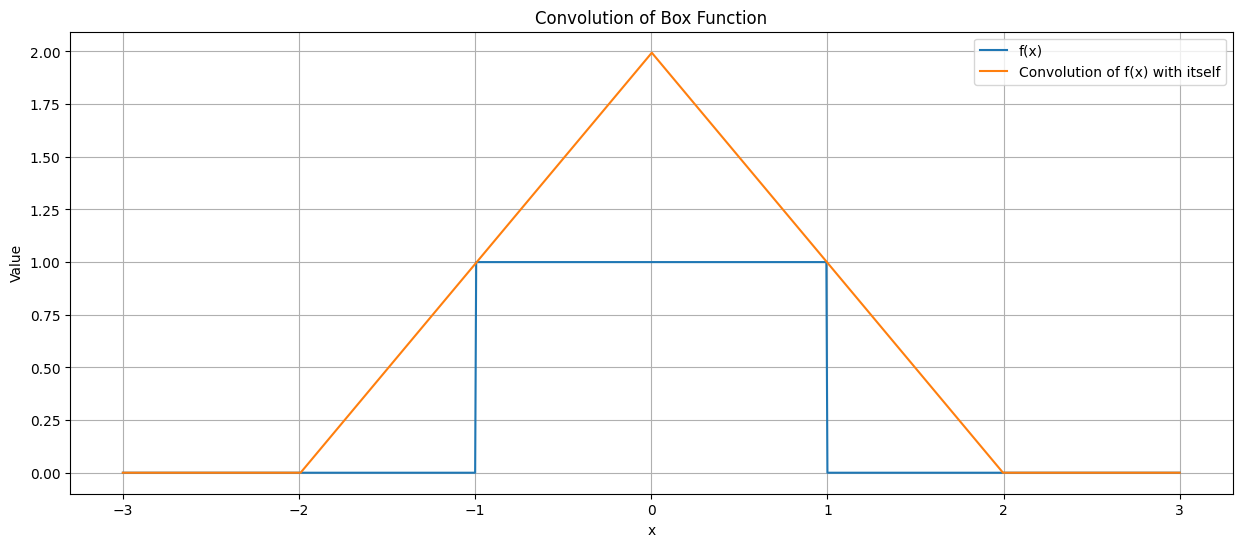

In [3]:
# Subhas
import numpy as np
import matplotlib.pyplot as plt

# Define the box function f(x)
def f(x):
    return np.where(np.logical_and(-1 < x, x < 1), 1, 0)

# Create an array of x values
x = np.linspace(-3, 3, 1000)
dx=(x[1] - x[0])

# Compute the convolution of f(x) with itself
convolution_result = np.convolve(f(x), f(x), mode='same') * dx  


plt.figure(figsize=(15, 6))
plt.plot(x, f(x), label='f(x)')
plt.plot(x, convolution_result, label='Convolution of f(x) with itself')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Convolution of Box Function')
plt.legend()
plt.grid(True)
plt.show()